In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path = "train (4).csv"

df = pd.read_csv(file_path)

df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [138]:
df.info() #informazioni sul dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [139]:
df.head() #primi 5 valori

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
# Calcolare il numero di sopravvissuti per classe 
sopravvissuti_per_classe = df[df['Survived'] == 1].groupby('Pclass').size() 
# Visualizzare il risultato print("Numero di sopravvissuti per classe:") print(sopravvissuti_per_classe)
print("Numero di sopravvissuti per classe:")
sopravvissuti_per_classe

Numero di sopravvissuti per classe:


Pclass
1    136
2     87
3    119
dtype: int64

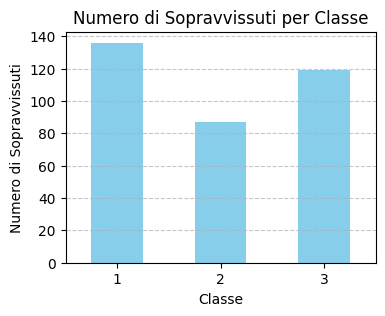

In [141]:
plt.figure(figsize=(4, 3)) 
sopravvissuti_per_classe.plot(kind='bar', color='skyblue') 
plt.title('Numero di Sopravvissuti per Classe') 
plt.xlabel('Classe') 
plt.ylabel('Numero di Sopravvissuti') 
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

In [142]:
# Filtrare i sopravvissuti
sopravvissuti = df[df['Survived'] == 1]

# Calcolare la media dell'età dei sopravvissuti per ogni classe e sesso
media_eta = sopravvissuti.groupby(['Pclass', 'Sex'])['Age'].mean().reset_index()

# Visualizzare il risultato
print("Media dell'età dei sopravvissuti per classe e sesso:")
print(media_eta)


Media dell'età dei sopravvissuti per classe e sesso:
   Pclass     Sex        Age
0       1  female  34.939024
1       1    male  36.248000
2       2  female  28.080882
3       2    male  16.022000
4       3  female  19.329787
5       3    male  22.274211


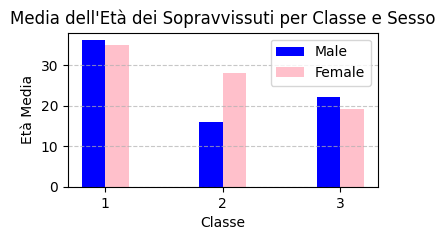

In [143]:
# Creare il grafico a barre
plt.figure(figsize=(4, 2))
bar_width = 0.2

# Creare le barre per ogni sesso
bar1 = plt.bar(media_eta[media_eta['Sex'] == 'male']['Pclass'] - bar_width/2, 
               media_eta[media_eta['Sex'] == 'male']['Age'], 
               bar_width, label='Male', color='blue')

bar2 = plt.bar(media_eta[media_eta['Sex'] == 'female']['Pclass'] + bar_width/2, 
               media_eta[media_eta['Sex'] == 'female']['Age'], 
               bar_width, label='Female', color='pink')

# Aggiungere etichette e titolo
plt.xlabel('Classe')
plt.ylabel('Età Media')
plt.title('Media dell\'Età dei Sopravvissuti per Classe e Sesso')
plt.xticks([1, 2, 3])
plt.legend()

# Aggiungere griglia
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrare il grafico
plt.show()


In [144]:
# Calcolare la distribuzione dei passeggeri per sesso in ogni classe.
distribuzione_sesso = df.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')
print(distribuzione_sesso)


   Pclass     Sex  Count
0       1  female     94
1       1    male    122
2       2  female     76
3       2    male    108
4       3  female    144
5       3    male    347


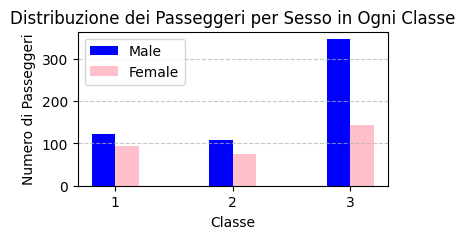

In [145]:
# Creare il grafico a barre
plt.figure(figsize=(4, 2))
bar_width = 0.2

# Creare le barre per ogni sesso
bar1 = plt.bar(distribuzione_sesso[distribuzione_sesso['Sex'] == 'male']['Pclass'] - bar_width/2, 
               distribuzione_sesso[distribuzione_sesso['Sex'] == 'male']['Count'], 
               bar_width, label='Male', color='blue')

bar2 = plt.bar(distribuzione_sesso[distribuzione_sesso['Sex'] == 'female']['Pclass'] + bar_width/2, 
               distribuzione_sesso[distribuzione_sesso['Sex'] == 'female']['Count'], 
               bar_width, label='Female', color='pink')

# Aggiungere etichette e titolo
plt.xlabel('Classe')
plt.ylabel('Numero di Passeggeri')
plt.title('Distribuzione dei Passeggeri per Sesso in Ogni Classe')
plt.xticks([1, 2, 3])
plt.legend()

# Aggiungere griglia
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrare il grafico
plt.show()


In [146]:
# l'età media dei passeggeri per ogni porto di imbarco
eta_media_porto = df.groupby('Embarked')['Age'].mean().reset_index()
print(eta_media_porto)


  Embarked        Age
0        C  30.814769
1        Q  28.089286
2        S  29.445397


In [147]:
# Sopravvivenza per Porto di Imbarco:
sopravvivenza_porto = df.groupby('Embarked')['Survived'].mean().reset_index()
print(sopravvivenza_porto)


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [148]:
# Relazione tra Età e Sopravvivenza
relazione_eta_sopravvivenza = df.groupby('Age')['Survived'].mean().reset_index()
print(relazione_eta_sopravvivenza)


      Age  Survived
0    0.42       1.0
1    0.67       1.0
2    0.75       1.0
3    0.83       1.0
4    0.92       1.0
..    ...       ...
83  70.00       0.0
84  70.50       0.0
85  71.00       0.0
86  74.00       0.0
87  80.00       1.0

[88 rows x 2 columns]


In [149]:
# il numero di fratelli/coniugi a bordo per classe e sesso
fratelli_coniugi = df.groupby(['Pclass', 'Sex'])['SibSp'].sum().reset_index()
print(fratelli_coniugi)


   Pclass     Sex  SibSp
0       1  female     52
1       1    male     38
2       2  female     37
3       2    male     37
4       3  female    129
5       3    male    173


In [150]:
# distribuzione delle cabine occupate dai passeggeri
cabine_occupate = df['Cabin'].value_counts().reset_index(name='Count')
print(cabine_occupate)


           Cabin  Count
0             G6      4
1    C23 C25 C27      4
2        B96 B98      4
3             F2      3
4              D      3
..           ...    ...
142          E17      1
143          A24      1
144          C50      1
145          B42      1
146         C148      1

[147 rows x 2 columns]


In [152]:
import matplotlib.pyplot as plt

# Creare il grafico a barre
plt.figure(figsize=(10, 6))
plt.bar(cabine_occupate['index'], cabine_occupate['Count'], color='skyblue')

# Aggiungere etichette e titolo
plt.xlabel('Cabina')
plt.ylabel('Numero di Passeggeri')
plt.title('Distribuzione delle Cabine Occupate dai Passeggeri')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrare il grafico
plt.show()


KeyError: 'index'

<Figure size 1000x600 with 0 Axes>